# PROJECT ON NLP TEXT CLASSIFICATION WITH SCIKIT LEARN & NLTK

Cleaning and prepraring the data for model training

In [15]:
import nltk

In [16]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

import some python libraries

In [17]:
import sys
import sklearn
import pandas
import numpy
import nltk

In [18]:
# load DATA SET 

import pandas as pd
import numpy as np

In [19]:
df = pd.read_table("C:/Users/GOURAV NEGI/Downloads/smsspamcollection/SMSSpamCollection",header = None, encoding = 'utf-8')
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


checking information about dataset

In [20]:
# print useful information about the data set 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [21]:
# check class distribution
classes = df[0]
print(classes.value_counts())

ham     4825
spam     747
Name: 0, dtype: int64


# Preprocessing the data

In [22]:
# preprocessing the data

# convert class labels to binary values, 0 = ham, 1 = spam

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y = encoder.fit_transform(classes)
print(classes[:10])
print(Y[:10])

0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
6     ham
7     ham
8    spam
9    spam
Name: 0, dtype: object
[0 0 1 0 0 1 0 0 1 1]


In [23]:
# store the SMS message data
text_messages = df[1]
print(text_messages[:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: 1, dtype: object


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# use Regular Expressions to replace email addresses urls, phone numbers, other numbers, symbols 

# Replace email addresses with ' emailaddr

processed = text_messages.str.replace(r'^\w+@[a-zA-Z_]+?\.[a-zA-Z]{2,}$','emailaddr')

# replace urls with webaddress.

processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# replace money symbols with ' moneysymb'

processed = processed.str.replace(r'£|\$','moneysymb')

# Replace 10 digit phone NUmbers with phonenumber

processed = processed.str.replace(r'^\(?[d]{3}\)?[\d](3)[\s-]?[\d]{4}$','phonenum')

# replace normal numbers with 'numbr

processed = processed.str.replace(r'\d+(\.\d+)?', 'number')

In [26]:
# Replace Punctuation

Processed = processed.str.replace(r'[^\w\d\s]',' ')

# Replace whitespace between terms with a single space

processed = processed.str.replace(r'\s+',' ')

# Remove leading and trailing whiespace

processed = processed.str.replace(r'^\s+|\s+?$',' ')

In [27]:
# change words to lower case - Hello, HELLO , hello are the same words.

processed = processed.str.lower()
print(processed)

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in number a wkly comp to win fa cup...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the numbernd time we have tried number...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: 1, Length: 5572, dtype: object


In [28]:
# Remove stop words from text messages

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [29]:
processed

0       go jurong point, crazy.. available bugis n gre...
1                           ok lar... joking wif u oni...
2       free entry number wkly comp win fa cup final t...
3               u dun say early hor... u c already say...
4                 nah think goes usf, lives around though
                              ...                        
5567    numbernd time tried number contact u. u moneys...
5568                         ü b going esplanade fr home?
5569             pity, * mood that. so...any suggestions?
5570    guy bitching acted like i'd interested buying ...
5571                                      rofl. true name
Name: 1, Length: 5572, dtype: object

In [30]:
from nltk.tokenize import word_tokenize

# creating a bag-of-words

all_words = []

for message in processed:
  words = word_tokenize(message)
  for w in words:
    all_words.append(w)

all_words  = nltk.FreqDist(all_words)

In [31]:
# print the total number words and the is most common words
print('NUmber of words: {}', format(len(all_words)))
print('Most common words :{}'.format(all_words.most_common(15)))

NUmber of words: {} 8633
Most common words :[('.', 4894), ('number', 2408), (',', 1979), ('?', 1550), ('!', 1397), ('...', 1146), ('u', 1136), ('&', 922), (';', 768), (':', 745), ('i', 712), ('..', 697), ('call', 578), (')', 499), ("'m", 395)]


In [32]:
# Use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [33]:
# Define a find_features function
def find_features(message):
  words = word_tokenize(message)
  features = {}
  for word in word_features:
    features[word] = (word in words)
  
  return features


# Lets see an example

features = find_features(processed[0])
for key, value in features.items():
  if value == True:
    print(key)

go
jurong
point
,
crazy
..
available
bugis
n
great
world
la
e
buffet
...
cine
got
amore
wat


In [34]:
features

{'go': True,
 'jurong': True,
 'point': True,
 ',': True,
 'crazy': True,
 '..': True,
 'available': True,
 'bugis': True,
 'n': True,
 'great': True,
 'world': True,
 'la': True,
 'e': True,
 'buffet': True,
 '...': True,
 'cine': True,
 'got': True,
 'amore': True,
 'wat': True,
 'ok': False,
 'lar': False,
 'joking': False,
 'wif': False,
 'u': False,
 'oni': False,
 'free': False,
 'entry': False,
 'number': False,
 'wkly': False,
 'comp': False,
 'win': False,
 'fa': False,
 'cup': False,
 'final': False,
 'tkts': False,
 'numberst': False,
 'may': False,
 '.': False,
 'text': False,
 'receive': False,
 'question': False,
 '(': False,
 'std': False,
 'txt': False,
 'rate': False,
 ')': False,
 't': False,
 '&': False,
 'c': False,
 "'s": False,
 'apply': False,
 'numberovernumber': False,
 'dun': False,
 'say': False,
 'early': False,
 'hor': False,
 'already': False,
 'nah': False,
 'think': False,
 'goes': False,
 'usf': False,
 'lives': False,
 'around': False,
 'though': False

In [35]:
# find features for all messages
messages = list(zip(processed,Y))

# define a seed for reproducibility

seed = 1 
np.random.seed = seed
np.random.shuffle(messages)

# call find_features function for each SMS messages

featuresets = [(find_features(text), label) for ( text,label) in messages]


split training and testing data sets using sklearn

In [36]:
# split training and testing data sets using sklearn

from sklearn import model_selection

training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state = seed )

In [37]:
print('Training: {}'.format(len(training)))
print('Testing: {}'.format(len(testing)))

Training: 4179
Testing: 1393


# scikit - Learn Classifiers with NLTK

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [40]:
# Define models to train
names  = {'K Nearest Neighbors', ' Decision Tree', 'Random Forest','Logistic Regression','SGD Classifier','Naive Bayes','SVM Linear'}

classifiers = {
     KNeighborsClassifier(),
      DecisionTreeClassifier(),
      RandomForestClassifier(),
      LogisticRegression(),
      SGDClassifier(max_iter = 100),
      MultinomialNB(),
      SVC(kernel = 'linear')
      
}

models = zip(names,classifiers)

wrap models to NLTK

In [41]:
# wrap models to NLTK

from nltk.classify.scikitlearn import SklearnClassifier

for name,model in models:
  nltk_model = SklearnClassifier(model)
  nltk_model.train(training)
  accuracy = nltk.classify.accuracy(nltk_model,testing)*100
  print('{}:Accuracy:{}'.format(name,accuracy))

Naive Bayes:Accuracy:96.69777458722182
Logistic Regression:Accuracy:98.20531227566404
K Nearest Neighbors:Accuracy:98.34888729361091
Random Forest:Accuracy:98.42067480258436
 Decision Tree:Accuracy:98.34888729361091
SGD Classifier:Accuracy:92.82124910265614
SVM Linear:Accuracy:97.91816223977028


ensembling method - Voting classifier

In [42]:
# ensemble method - Voting classifier

from sklearn.ensemble import VotingClassifier

# Define models to trian

names = ['K Nearest Neighbors',' Decision Tree','Random Forest',' Logistic Regression','SGD Classifier',
         'Naive Bayes','SVM Linear']

classifiers = [
      KNeighborsClassifier(),
      DecisionTreeClassifier(),
      RandomForestClassifier(),
      LogisticRegression(),
      SGDClassifier(max_iter = 100),
      MultinomialNB(),
      SVC(kernel = 'linear')
]

models = list(zip(names,classifiers))
nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models,voting = 'hard',n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_ensemble,testing)*100
print('Ensemble Method Accuracy:{}',format(accuracy))


Ensemble Method Accuracy:{} 98.42067480258436


In [43]:
# Male class table prediction for testing set

txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

confusion matrix and a classification report

In [61]:
# print a confusion matrix and a classification report


cm = pd.DataFrame(
    confusion_matrix(labels,prediction),
    index = [['actual','actual'],['ham','spam']],
    columns = [['predicted','predicted'],['ham','scikitlearn']]
)

heatmap of coorelation

Text(23.999999999999996, 0.5, 'ACTUAL VALUES')

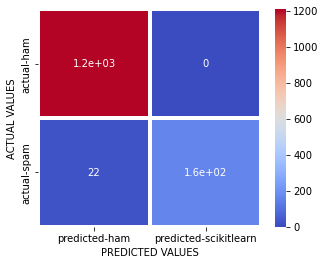

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True,cmap = 'coolwarm', linewidth = 4)
plt.xlabel('PREDICTED VALUES')
plt.ylabel('ACTUAL VALUES')

classification report

In [47]:
print(classification_report(labels,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1207
           1       1.00      0.88      0.94       186

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393

